In [11]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def words(n,alphabet):
    if (n==0):
        return [()]
    smaller_words = words(n-1,alphabet)
    return sum([[w+(i,) for w in smaller_words] for i in alphabet],[])

In [3]:
def permutations(n):
    return permutation_from_list(list(range(n)))
    
def permutation_from_list(l):
    if len(l)==0:
        return [[]]
    return sum([[[l[i]]+w for w in permutation_from_list(l[:i]+l[i+1:])] for i in range(len(l))],[])

In [4]:
def generate_graphs(n):
    return [np.matrix(w,int).reshape(n,n) for w in words(n*n,(0,1))]
graphs = generate_graphs(4)   

In [5]:
def apply_permutation(G,perm):
    N = G.copy()
    (n,m) = G.shape
    for i in range(n):
        for j in range(m):
            N[i,j]=G[perm[i],perm[j]]
    return N

def all_permutations(G):
    n,_ = G.shape
    return frozenset(tuple(apply_permutation(G,perm).flatten().tolist()[0]) for perm in permutations(n))

def is_stronlgy_connected(G):
    n,_ = G.shape
    A = sum(G**k for k in range(n+1))
    for i in range(n):
        for j in range(n):
            if A[i,j]==0:
                return False
    return True

In [7]:
def generate_graphs_up_to_isomorphism(n, strongly_connected=False):
    graphs = generate_graphs(n)
    if strongly_connected:
        graphs = [G for G in graphs if is_stronlgy_connected(G)]
    isomorphism_classes = set(all_permutations(G) for G in graphs)
    graphs_up_to_isomorphism = [np.array(next(iter(c))).reshape(n,n) for c in isomorphism_classes]
    return graphs_up_to_isomorphism

for i in range(1,5):
    print(len(generate_graphs_up_to_isomorphism(i,strongly_connected=True)))


2
3
30
1168


In [9]:
graphs = generate_graphs_up_to_isomorphism(3,strongly_connected=True)

In [12]:
graphs.sort(key=lambda x:sum(sum(x)))

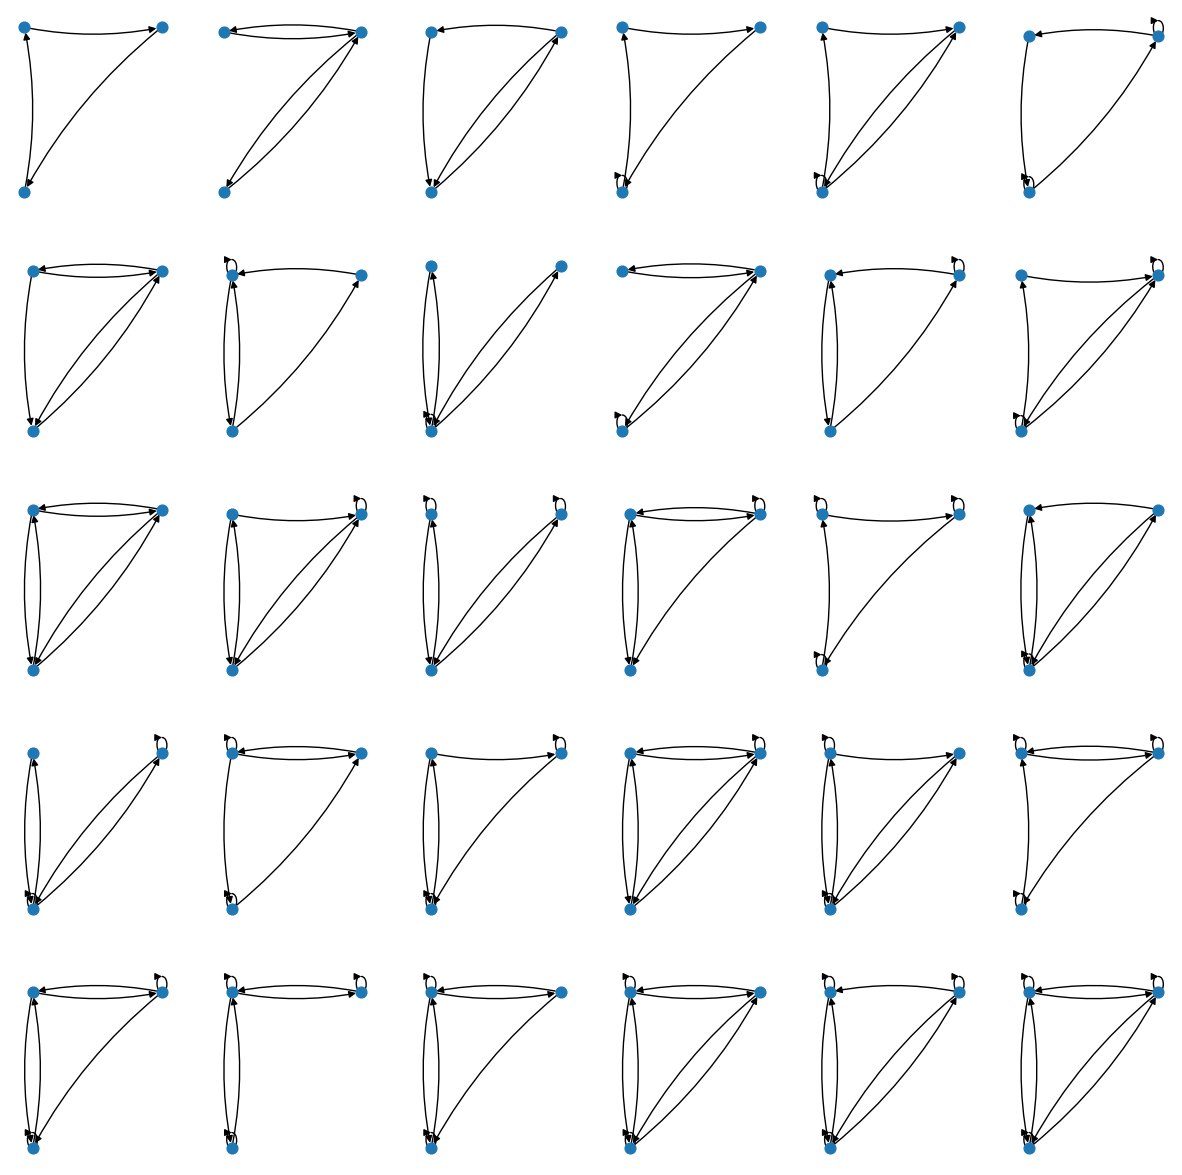

In [13]:
fig,axar = plt.subplots(5,6);
fig.set_figheight(15)
fig.set_figwidth(15)
axlist = list(axar.flatten()) 
pos = {0:(0,0), 1:(0,1), 2: (1,1)}
for i,G in enumerate(graphs):
    nx.draw(nx.DiGraph(graphs[i]),pos=pos,ax=axlist[i],node_size=60,arrows=True,connectionstyle="arc3,rad=0.1")

In [14]:
def maximal_essential_subgraph(G):
    n = G.shape[0]
    rowsum = np.sum(G,1).flatten()
    columnsum = np.sum(G,0).flatten()
    keep = [i for i in range(n) if rowsum[0,i]!=0 and columnsum[0,i]!=0]
    if len(keep)==n:
        return G
    return maximal_essential_subgraph(G[keep,:][:,keep])
    

In [15]:
D=nx.DiGraph([[0,1],[1,2],[2,3],[3,4],[4,5],[5,6],[3,2]])
G=nx.adjacency_matrix(D).todense()

/tmp/ipykernel_25429/2882917010.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  G=nx.adjacency_matrix(D).todense()


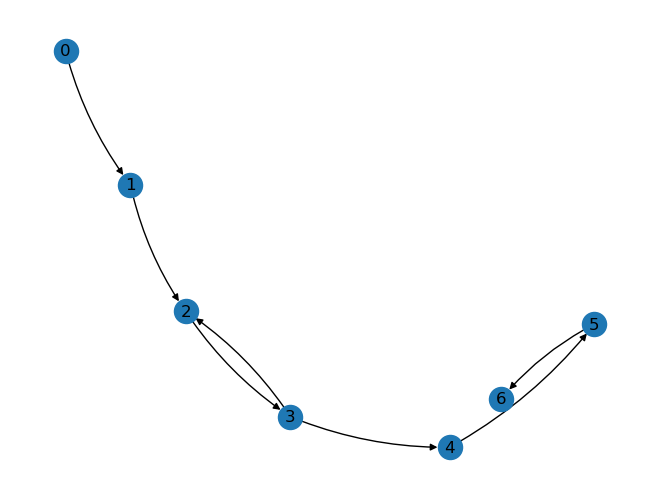

In [16]:
nx.draw(D,with_labels=True,connectionstyle="arc3,rad=0.1")

In [17]:
maximal_essential_subgraph(G)

matrix([[0, 1],
        [1, 0]])